<a href="https://colab.research.google.com/github/geoaura/KSAFM_Data_FloX/blob/main/Data_process_dp_10min_RDA_Almemo_draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
###########################################
#엑셀 자료 처리 python code
###########################################
#Input: csv
#Output: csv
###########################################
#Code update info.
#v01.0, 22.08.08., made by Jae-Hyun RYU
#       Read, Process, and Write code
###########################################

# 라이브러리 읽기

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

#설정

In [4]:
input_data ='/content/drive/MyDrive/Colab_Notebooks/RDA/Almemo/220714_sj_almemo_raw.csv'
output_path='/content/drive/MyDrive/Colab_Notebooks/RDA/Almemo/220714_sj_almemo_raw_1D.csv'
column_names=['date','wd','ws','ws_max','P','Ta','RH','Rainfall','Rain intensity','Snow','Rad'] 

set_first_date='2022-02-23 00:00:00'
set_end_date  ='2022-07-14 23:00:00'
set_time_freq ='1D'
min           =60*24 #1일인 경우 60분x24시간

#자료 읽기

In [5]:
dataset=pd.read_csv(input_data)[column_names]

# 시간 간격 설정

In [6]:
first_date= datetime.strptime(set_first_date,'%Y-%m-%d %H:%M:%S')
end_date  = datetime.strptime(set_end_date  ,'%Y-%m-%d %H:%M:%S')
refTT     = pd.date_range(first_date, end_date, freq=set_time_freq)

In [7]:
date      =dataset.pop('date')
date_local=[datetime.strptime(d, '%Y-%m-%d %H:%M') for d in date]
dataset.insert(0,"datetime",date_local, True)

#설정된 시간 간격에 따라 자료 처리(수정필요한 영역)

In [8]:
#원하는 변수 만들기
Xaxis_name=[]
Xaxis_date=[]
Ws=[]
Ta=[]
Rainfall=[]
Rad=[]
nt=[]
for dn in refTT[:]:
  first_hour =datetime.strftime(dn,'%Y-%m-%d %H:%M:%S') 
  first_hour2=datetime.strptime(first_hour,'%Y-%m-%d %H:%M:%S')
  end_hour   =datetime.strptime(first_hour,'%Y-%m-%d %H:%M:%S')+timedelta(minutes=min)

  dataset_filter=dataset.copy()
  dataset_filter=dataset_filter[(dataset_filter['datetime']>=first_hour) & (dataset_filter['datetime']<end_hour)]

  Ws_value      =pd.to_numeric(dataset_filter['ws']      , errors='coerce')
  Ta_value      =pd.to_numeric(dataset_filter['Ta']      , errors='coerce')
  Rainfall_value=pd.to_numeric(dataset_filter['Rainfall'], errors='coerce')
  Rad_value     =pd.to_numeric(dataset_filter['Rad']     , errors='coerce')

  Xaxis_name.append( first_hour2 )
  Xaxis_date.append( datetime.strftime(first_hour2,'%Y-%m-%d %H:%M') )
  if len(Ta_value)>0:
    Ws.append(round(np.nanmean(Ws_value),4))
    Ta.append(round(np.nanmean(Ta_value),4))
    Rainfall.append(round(np.nansum(Rainfall_value),4))
    Rad.append(round(np.nanmean(Rad_value),4))
    nt.append(int(len(Ta_value)))
  else:
    Ws.append(-999)
    Ta.append(-999)
    Rainfall.append(-999)
    Rad.append(-999)
    nt.append(int(len(Ta_value)))

#자료 저장(수정필요한 영역)

In [9]:
data_array=list(zip(Xaxis_date, Ws, Ta, Rainfall, Rad, nt))
save_data_array=pd.DataFrame(data_array)

output_column_names=['datetime','Ws','Ta','Rainfall','Radiation','n']
save_data_array.to_csv(output_path, sep=',', na_rep='-999', header=output_column_names, index=False) 

In [10]:
import matplotlib as plt
from pylab import *

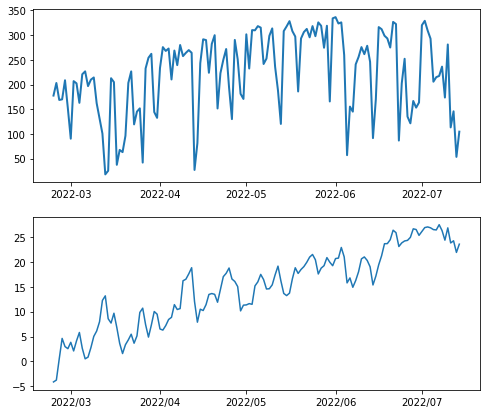

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(2,figsize=(8, 7))

ax[0].plot(Xaxis_name,Rad, linewidth=2.0)
ax[1].plot(Xaxis_name,Ta)

dateFmt = mdates.DateFormatter('%Y-%m')
ax[0].xaxis.set_major_formatter(dateFmt)
dateFmt = mdates.DateFormatter('%Y/%m')
ax[1].xaxis.set_major_formatter(dateFmt)

plt.savefig("./save.png",dpi=300)
plt.show()

2022-02-23 00:00:00


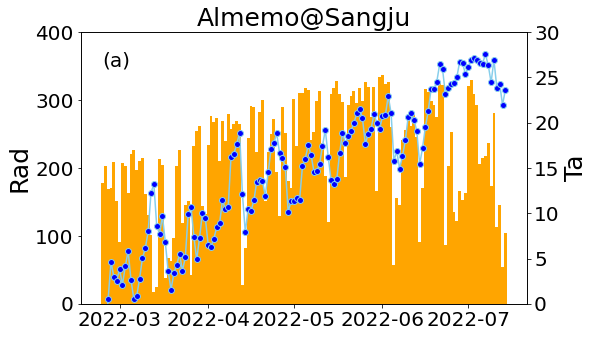

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(Xaxis_name, Rad,color='orange', width = 1)
ax1.set_ylim(0,400)

ax2 = ax1.twinx()
ax2.plot(Xaxis_name,Ta,
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
ax2.set_ylim(0,30)

plt.rcParams.update({'font.size': 20})
ax1.set_ylabel("Rad",fontsize=25)
ax2.set_ylabel("Ta",fontsize=25)
ax1.set_xlabel("Date (YYYY-MM)",fontsize=25)

print (Xaxis_name[0])
ax1.text(Xaxis_name[0],350,"(a)",fontsize=20)

plt.title("Almemo@Sangju", fontsize=25)

plt.savefig("./save.png",dpi=300)
plt.show()